In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# NBVAL_IGNORE_OUTPUT
sys.path.insert(0,os.path.join(os.getcwd(), '../'))
module_path = os.path.abspath(os.path.join('../src'))
if module_path not in sys.path:
    sys.path.append(module_path)


In [3]:
from meteor import MeteorPatternScaling

In [4]:
from meteor.prpatt import global_mean

In [5]:
test_data_dir = os.path.join('../tests/test-data')


In [6]:
# NBVAL_IGNORE_OUTPUT
canesm_basic_pattern = MeteorPatternScaling(
        "pdrmip-CanESM2-basic",
        {"tas": 2, "pr": 2},
        lambda exp: os.path.join(test_data_dir, f"pdrmip-{exp}_T42_ANN.nc"),
        exp_list=["base", "co2x2"],
    )



Parameter nystart not in pamset. Using default value 1750
Parameter nyend not in pamset. Using default value 2100
Parameter emstart not in pamset. Using default value 1850
/Users/sanderson/pyenv/ciceroscm/lib/python3.10/site-packages/meteor/scm_forcer_engine.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.concentrations_data.loc[self.emstart : self.emstart + 6].iloc[:] = (
/Users/sanderson/pyenv/ciceroscm/lib/python3.10/site-packages/meteor/scm_forcer_engine.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.emissions_data.loc[self.emstart : self.emstart + 6].iloc[:] = (
Parameter conc_run is not used

Plot reconstructions of the pulse-response function

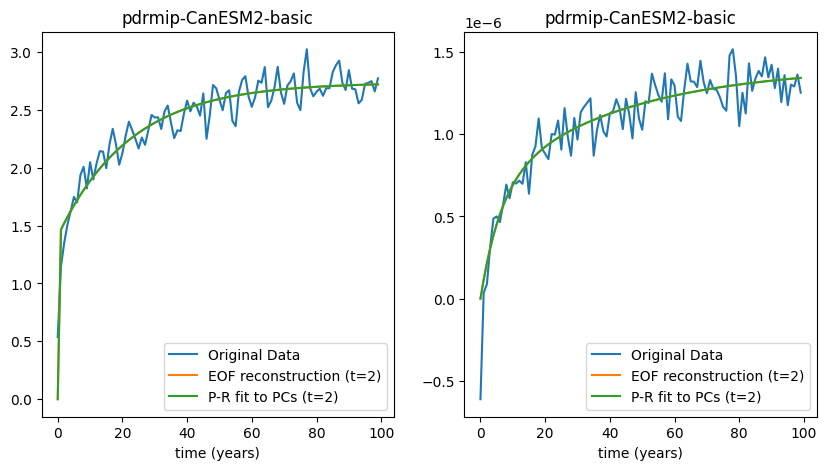

In [7]:
# NBVAL_IGNORE_OUTPUT
f, (ax1, ax2)=plt.subplots(1,2,figsize=[10,5])
canesm_basic_pattern.plot_global_mean_values(ax1,'tas','co2x2')
canesm_basic_pattern.plot_global_mean_values(ax2,'pr','co2x2')


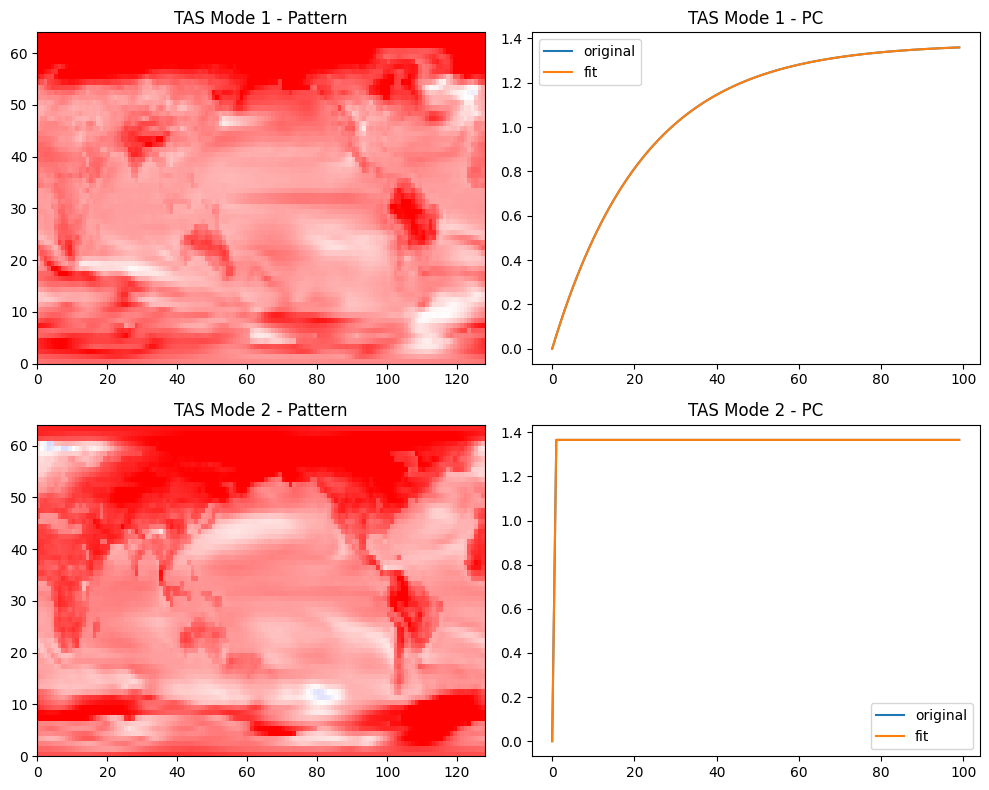

In [8]:
# NBVAL_IGNORE_OUTPUT
#plot spatial patterns associated with each mode
f, ax = plt.subplots(2,2,figsize=[10,8])
ax[0,0].pcolor(canesm_basic_pattern.pattern_dict['co2x2']['tas']["orgeof"]["v"][0, :, :],cmap="bwr",vmin=-2,vmax=2)
ax[0,0].set_title('TAS Mode 1 - Pattern')

ax[1,0].pcolor(canesm_basic_pattern.pattern_dict['co2x2']['tas']["orgeof"]["v"][1, :, :],cmap="bwr",vmin=-2,vmax=2)
ax[1,0].set_title('TAS Mode 2 - Pattern')

ax[0,1].plot(canesm_basic_pattern.pattern_dict['co2x2']['tas']["orgeof"]["u"][:,0],label='original')
ax[0,1].plot(canesm_basic_pattern.pattern_dict['co2x2']['tas']["neweof"]["u"][:,0],label='fit')
ax[0,1].set_title('TAS Mode 1 - PC')
ax[0,1].legend()
ax[1,1].plot(canesm_basic_pattern.pattern_dict['co2x2']['tas']["orgeof"]["u"][:,1],label='original')
ax[1,1].plot(canesm_basic_pattern.pattern_dict['co2x2']['tas']["neweof"]["u"][:,1],label='fit')
ax[1,1].set_title('TAS Mode 2 - PC')
ax[1,1].legend()
plt.tight_layout()

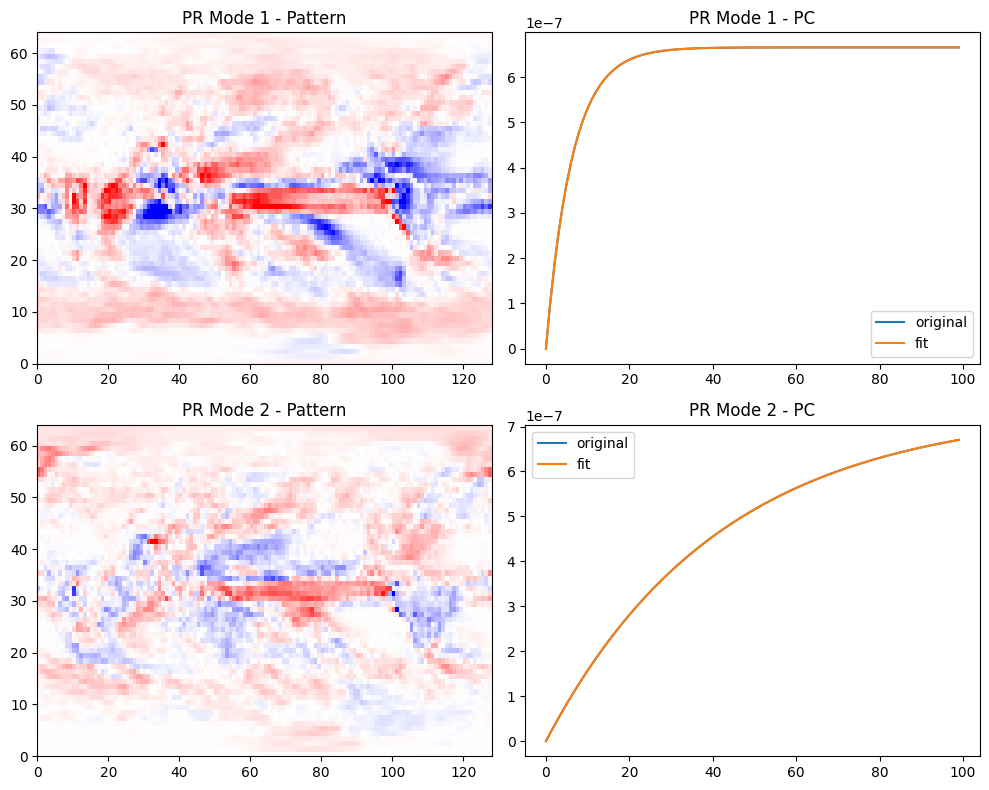

In [9]:
# NBVAL_IGNORE_OUTPUT
#plot spatial patterns associated with each mode
f, ax = plt.subplots(2,2,figsize=[10,8])
ax[0,0].pcolor(canesm_basic_pattern.pattern_dict['co2x2']['pr']["orgeof"]["v"][0, :, :],cmap="bwr",vmin=-30,vmax=30)
ax[0,0].set_title('PR Mode 1 - Pattern')

ax[1,0].pcolor(canesm_basic_pattern.pattern_dict['co2x2']['pr']["orgeof"]["v"][1, :, :],cmap="bwr",vmin=-30,vmax=30)
ax[1,0].set_title('PR Mode 2 - Pattern')

ax[0,1].plot(canesm_basic_pattern.pattern_dict['co2x2']['pr']["orgeof"]["u"][:,0],label='original')
ax[0,1].plot(canesm_basic_pattern.pattern_dict['co2x2']['pr']["neweof"]["u"][:,0],label='fit')
ax[0,1].set_title('PR Mode 1 - PC')
ax[0,1].legend()
ax[1,1].plot(canesm_basic_pattern.pattern_dict['co2x2']['pr']["orgeof"]["u"][:,1],label='original')
ax[1,1].plot(canesm_basic_pattern.pattern_dict['co2x2']['pr']["neweof"]["u"][:,1],label='fit')
ax[1,1].set_title('PR Mode 2 - PC')
ax[1,1].legend()
plt.tight_layout()


Model test

In [10]:
# NBVAL_IGNORE_OUTPUT
#define a gaussian forcing profile

f=1*np.exp(-np.square(np.arange(0,500)-150)/5000)



In [11]:
#run the emulator

mdl_out=canesm_basic_pattern.predict_from_forcing_profile(f, 'tas', exp="co2x2")

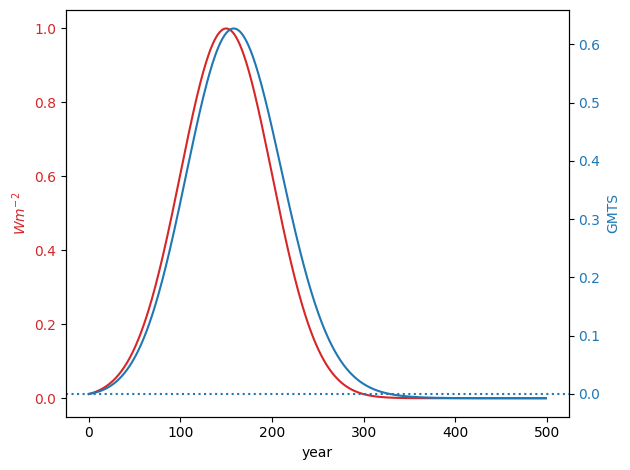

In [12]:
# NBVAL_IGNORE_OUTPUT
#plot global mean forcing and temperature to illustrate lagged response
gmt=global_mean(mdl_out)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('$Wm^{-2}$', color=color)
ax1.plot(f, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('GMTS', color=color)  # we already handled the x-label with ax1
ax2.plot(gmt, color=color)
ax2.axhline(0,linestyle=':')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
